In [1]:
# import os
# from ocr import ocr
# import time
# import shutil
# import numpy as np
# from PIL import Image
# from glob import glob
# 导入模块
import torchvision.transforms.functional as TF
from PIL import Image
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt

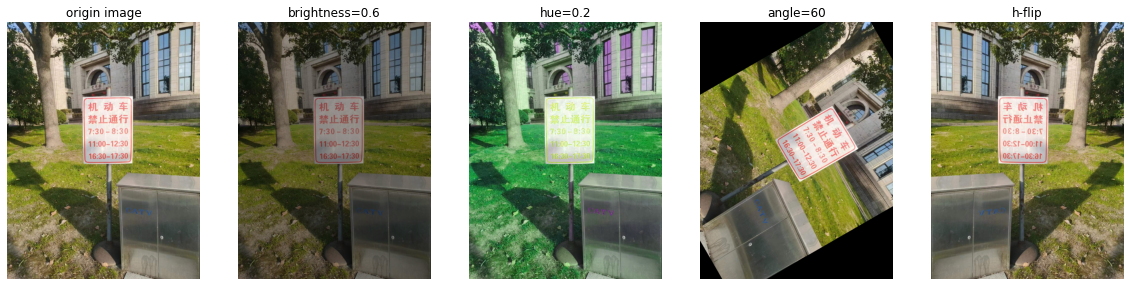

In [2]:
#数据预处理
img = cv2.imread("t3.jpg") # 读图
orig_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # cv2和plt的通道顺序不同
orig_img = Image.fromarray(orig_img) # 转为PIL格式图片

brightness_img_4 = TF.adjust_brightness(orig_img, 0.6)
hue_img_6 = TF.adjust_hue(orig_img, 0.2)
affine_img_4 = TF.affine(orig_img, angle=60,translate=[0,0],scale=1, shear=0)
hflip = TF.hflip(orig_img)

fig, axes = plt.subplots(1,5,figsize=(20,5))

axes[0].imshow(orig_img)
axes[1].imshow(brightness_img_4)
axes[2].imshow(hue_img_6)
axes[3].imshow(affine_img_4)
axes[4].imshow(hflip)

axes[0].set_title("origin image")
axes[1].set_title("brightness=0.6")
axes[2].set_title("hue=0.2")
axes[3].set_title("angle=60")
axes[4].set_title("h-flip")

axes[0].axis("off")
axes[1].axis("off")
axes[2].axis("off")
axes[3].axis("off")
axes[4].axis("off")
plt.show()

exist pretrained  True
using pretrained weight: /root/ocr/CTPN3.pth
Epoch 17/18
##################################################


/root/miniconda3/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:129: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
/root/miniconda3/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: htt

Ep:17/17--Batch:0/200
batch: loss_cls:0.4995--loss_regr:0.0761--loss:0.5756
Epoch: loss_cls:0.4995--loss_regr:0.0761--loss:0.5756

Ep:17/17--Batch:40/200
batch: loss_cls:0.7138--loss_regr:0.2925--loss:1.0063
Epoch: loss_cls:0.4316--loss_regr:0.1162--loss:0.5477

Ep:17/17--Batch:80/200
batch: loss_cls:0.1727--loss_regr:0.0410--loss:0.2137
Epoch: loss_cls:0.4470--loss_regr:0.1105--loss:0.5575

Ep:17/17--Batch:120/200
batch: loss_cls:0.6260--loss_regr:0.9942--loss:1.6203
Epoch: loss_cls:0.4567--loss_regr:0.1178--loss:0.5745

Ep:17/17--Batch:160/200
batch: loss_cls:0.1843--loss_regr:0.0716--loss:0.2559
Epoch: loss_cls:0.4587--loss_regr:0.1150--loss:0.5737

Epoch:17--0.4450--0.1145--0.5595
[Errno 2] No such file or directory: 'ocr/v3_ctpn_ep17_0.4450_0.1145_0.5595.pth'
fail to save to ocr/v3_ctpn_ep17_0.4450_0.1145_0.5595.pth
saving to ocr/v3_ctpn_ep17_0.4450_0.1145_0.5595.pth


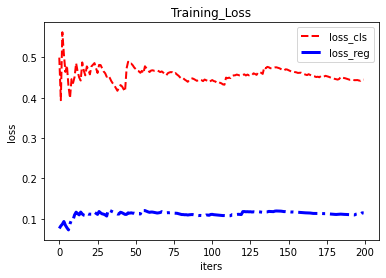

In [1]:
#训练阶段-检测部分
import matplotlib.pyplot as plt
from train_code.train_ctpn.ctpn_train import train_dec
loss_cl, loss_reg, num = train_dec()
plt.title("Training_Loss")
plt.xlabel("iters")
plt.ylabel("loss")
plt.plot(num,loss_cl,color='red',linewidth=2.0,linestyle='--',label="loss_cls")
plt.plot(num,loss_reg,color='blue',linewidth=3.0,linestyle='-.',label="loss_reg")
plt.legend()
plt.show()


Random Seed:  2995
loading pretrained model from CRNN-1010.pth
epoch 0....
epoch: 0 iter: 0/5 Train loss: 119.983
epoch: 0 iter: 1/5 Train loss: 18.355
epoch: 0 iter: 2/5 Train loss: 15.265
epoch: 0 iter: 3/5 Train loss: 12.389
epoch: 0 iter: 4/5 Train loss: 14.306
Train loss: 36.059464
Start val
filename:train_code/train_crnn/train_data/data/img_0000001.jpg
pred  :不用留地址了!"洪裳说
target:不用留地址了！"洪裳说
filename:train_code/train_crnn/train_data/data/img_0000002.jpg
pred  :孩赫晓瀚
target:孩林晓梅
filename:train_code/train_crnn/train_data/data/img_0000003.jpg
pred  :实验
target:三会
filename:train_code/train_crnn/train_data/data/img_0000005.jpg
pred  :同过学!"
target:同过学！"
filename:train_code/train_crnn/train_data/data/img_0000006.jpg
pred  :免除了,所以总训斥贾梅说
target:免除了，所以总训斥贾梅说
filename:train_code/train_crnn/train_data/data/img_0000007.jpg
pred  :在中国作家协合第三届儿童文学
target:在中国作家协会第三届儿童文学
filename:train_code/train_crnn/train_data/data/img_0000008.jpg
pred  :职夭放了学就把他清来。
target:明天放了学就把他请来，
filename:train_code/train_crnn/

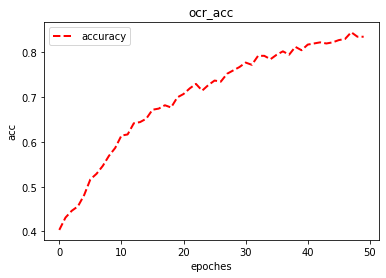

In [2]:
#训练阶段-识别部分
import matplotlib.pyplot as plt
from train_code.train_crnn.train_pytorch_ctc import train_rec
from train_code.train_crnn.crnn import CRNN
from torch.nn import CTCLoss
criterion = CTCLoss(reduction='sum',zero_infinity=True)
acc,epoches= train_rec(CRNN, criterion)
idx = range(0,epoches)
plt.title("ocr_acc")
plt.xlabel("epoches")
plt.ylabel("acc")
plt.plot(idx,acc,color='red',linewidth=2.0,linestyle='--',label="accuracy")
plt.legend()
plt.show()

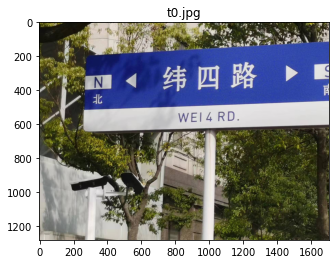

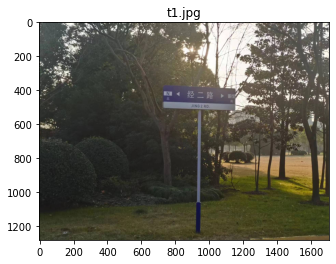

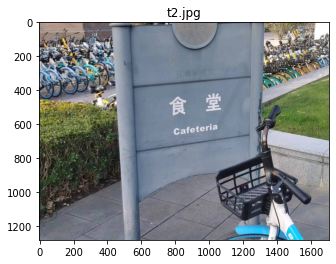

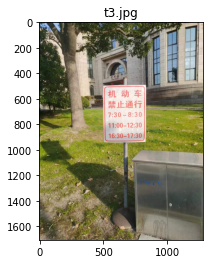

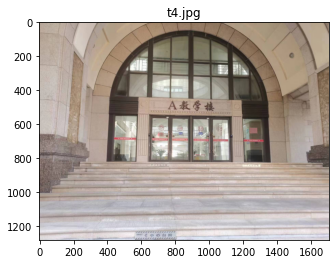

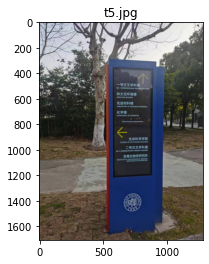

In [3]:
import os
import matplotlib.pyplot as plt

test_dir = os.path.join("test_images")
test_image_names = os.listdir(test_dir)
for i in range(1, len(test_image_names)):
    im = plt.imread(test_dir +"/" + test_image_names[i])
    plt.title(test_image_names[i])
    plt.imshow(im)
    plt.show()


cuda:0
1
开始预测
1678068216.5142515
test_result/t0.txt


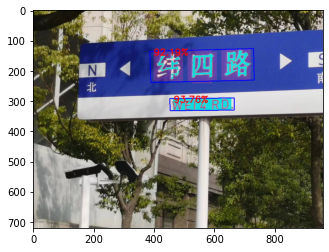

Mission complete, it took 0.509s

Recognition Result:

纬四路
WEI4RD.
1678068217.0241308
test_result/t1.txt


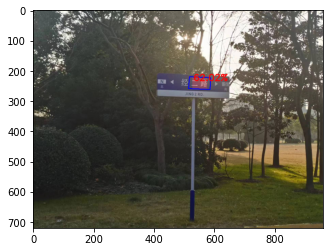

Mission complete, it took 0.401s

Recognition Result:

二路
1678068217.4254334
test_result/t2.txt


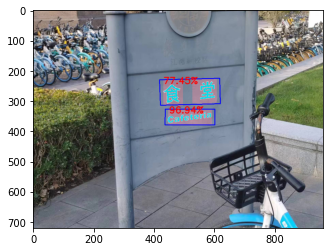

Mission complete, it took 0.417s

Recognition Result:

食堂
cafetaria
1678068217.8430917
test_result/t3.txt


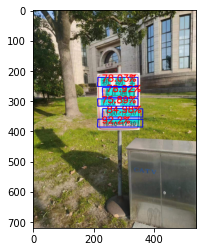

Mission complete, it took 0.338s

Recognition Result:

机动车
禁止通行
7:30-8:30
11:00-12:30
16:30-17:30
1678068218.1818535
test_result/t4.txt


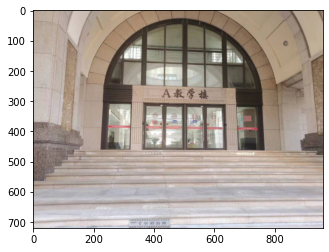

Mission complete, it took 0.374s

Recognition Result:

1678068218.5565317
test_result/t5.txt


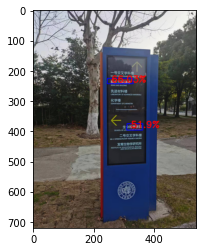

Mission complete, it took 0.287s

Recognition Result:

林大式球组核
税学数票学服


In [4]:
#测试阶段-结果展示
import os
from ocr import ocr
import time
import shutil
import numpy as np
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
#定义单张图片检测识别
def single_pic_proc(image_file):
    image = np.array(Image.open(image_file).convert('RGB'))
    result, image_framed = ocr(image)
    return result,image_framed

image_files = glob('test_images/*.*')
result_dir = 'test_result'
if os.path.exists(result_dir):
    shutil.rmtree(result_dir)
os.mkdir(result_dir)
print("开始预测")
for image_file in sorted(image_files):
    t = time.time()
    print(t)
    result, image_framed = single_pic_proc(image_file)
    output_file = os.path.join(result_dir, image_file.split('/')[-1])
    txt_file = os.path.join(result_dir, image_file.split('/')[-1].split('.')[0]+'.txt')
    print(txt_file)
    txt_f = open(txt_file, 'w')
    plt.imshow(image_framed)
    plt.show()
    Image.fromarray(image_framed).save(output_file)
    print("Mission complete, it took {:.3f}s".format(time.time() - t))
    print("\nRecognition Result:\n")
    for key in result:
        print(result[key][1])
        txt_f.write(result[key][1]+'\n')
    txt_f.close()